In [15]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.metrics import categorical_accuracy as acc
from keras.optimizers import SGD

from sklearn.metrics import cohen_kappa_score


In [16]:
# define the metric

def custom_metric(y1,y2):
    return cohen_kappa_score(y1, y2, weights = 'quadratic')

In [18]:
# model design

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(206,206,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=[acc])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 204, 204, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 102, 102, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 48, 48, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 73728)             0         
__________

In [19]:
# train set and validation set

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(206, 206),
        batch_size=20,
        classes=['0', '1', '2', '3', '4'],
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'dataset/validation',
        target_size=(206, 206),
        batch_size=20,
        classes=['0', '1', '2', '3', '4'],
        class_mode='categorical')

Found 10275 images belonging to 5 classes.
Found 2915 images belonging to 5 classes.


In [20]:

history = model.fit_generator(
        train_generator,
        steps_per_epoch=513,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=145)

Epoch 1/15
513/513 [==============================] - 58s 113ms/step - loss: 1.4729 - categorical_accuracy: 0.2699 - val_loss: 1.4658 - val_categorical_accuracy: 0.2786
Epoch 2/15
513/513 [==============================] - 57s 111ms/step - loss: 1.4684 - categorical_accuracy: 0.2703 - val_loss: 1.4636 - val_categorical_accuracy: 0.2639
Epoch 3/15
513/513 [==============================] - 57s 111ms/step - loss: 1.4606 - categorical_accuracy: 0.2820 - val_loss: 1.4627 - val_categorical_accuracy: 0.2922
Epoch 4/15
513/513 [==============================] - 57s 111ms/step - loss: 1.4531 - categorical_accuracy: 0.2892 - val_loss: 1.4758 - val_categorical_accuracy: 0.2829
Epoch 5/15
513/513 [==============================] - 57s 111ms/step - loss: 1.4350 - categorical_accuracy: 0.3086 - val_loss: 1.4872 - val_categorical_accuracy: 0.2383
Epoch 6/15
513/513 [==============================] - 57s 111ms/step - loss: 1.3949 - categorical_accuracy: 0.3565 - val_loss: 1.4833 - val_categorical_acc

dict_keys(['val_categorical_accuracy', 'loss', 'val_loss', 'categorical_accuracy'])


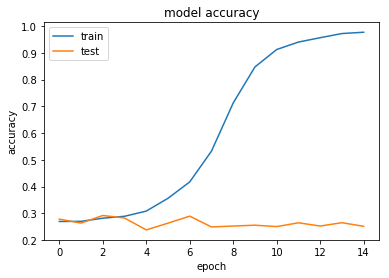

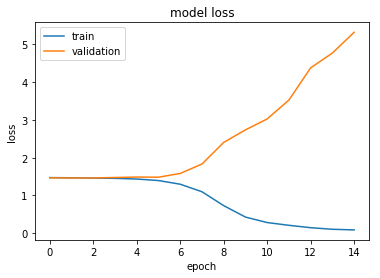

In [22]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [19]:
# save the model

model.save('Baseline_CNN_t10275_v2915_e15.h5')

In [24]:
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(206, 206),
    batch_size=10,
    classes=['0', '1', '2', '3', '4'],
    class_mode='categorical')

Found 1462 images belonging to 5 classes.


In [25]:
# test the model on unseen data

results = model.evaluate_generator(
    test_generator,
    verbose=1,
    steps=146)

146/146 [==============================] - 7s 45ms/step


In [26]:
print('Final test accuracy:', (results))


Final test accuracy: [5.075392963951582, 0.23835616987453748]
